<a href="https://colab.research.google.com/github/faiggafarov/PCA-Eigenvector/blob/main/pca_using_eigenvector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PCA : Principal Component Analysis

>
Principal Component Analysis (PCA) is a powerful technique often used in data analysis to simplify complex, high-dimensional datasets. It does this by reducing the number of variables, which makes the data easier to understand and interpret, while still preserving as much of the original information as possible. The core idea is to create new variables—called principal components—that are uncorrelated and capture the most variance in the dataset. These components are calculated through an ***eigenvalue/eigenvector*** problem, which essentially identifies the directions in the data where the most significant patterns or differences exist. PCA is particularly useful in areas like machine learning, image processing, and data visualization, where large datasets can overwhelm analysis. By focusing on the key components, it helps reveal the underlying structure of the data in a more accessible way.

**Eigen Vector Decomposition (EVD) - Eigen Values and Eigen Vectors**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [ ]:
df = pd.read_csv('iris.csv')
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [ ]:
df.columns=['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm', 'Class']

In [ ]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Class
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


**Scatter Plot**

In [ ]:
df.Class.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [ ]:
df_setosa = df[df.Class == 'Iris-setosa']
df_versicolor = df[df.Class == 'Iris-versicolor']
df_virginica = df[df.Class == 'Iris-virginica']

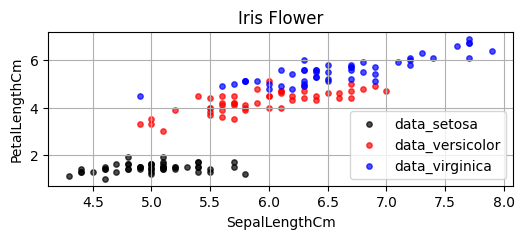

In [ ]:
plt.figure(figsize = (6,2))
plt.scatter(df_setosa["SepalLengthCm"], df_setosa["PetalLengthCm"], color = "black", s = 15, alpha = 0.7, label = "data_setosa")
plt.scatter(df_versicolor["SepalLengthCm"], df_versicolor["PetalLengthCm"], color = "red", s = 15, alpha = 0.7, label = "data_versicolor")
plt.scatter(df_virginica["SepalLengthCm"], df_virginica["PetalLengthCm"], color = "blue", s = 15, alpha = 0.7, label = "data_virginica")
plt.title("Iris Flower")
plt.xlabel("SepalLengthCm")
plt.ylabel("PetalLengthCm")
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
print(df.isnull().values.any())

False


In [ ]:
df.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Class
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [ ]:
df = df.drop(columns=['Id'])

**Boxplot**

array([[<Axes: title={'center': 'PetalLengthCm'}, xlabel='[Class]'>,
        <Axes: title={'center': 'PetalWidthCm'}, xlabel='[Class]'>],
       [<Axes: title={'center': 'SepalLengthCm'}, xlabel='[Class]'>,
        <Axes: title={'center': 'SepalWidthCm'}, xlabel='[Class]'>]],
      dtype=object)

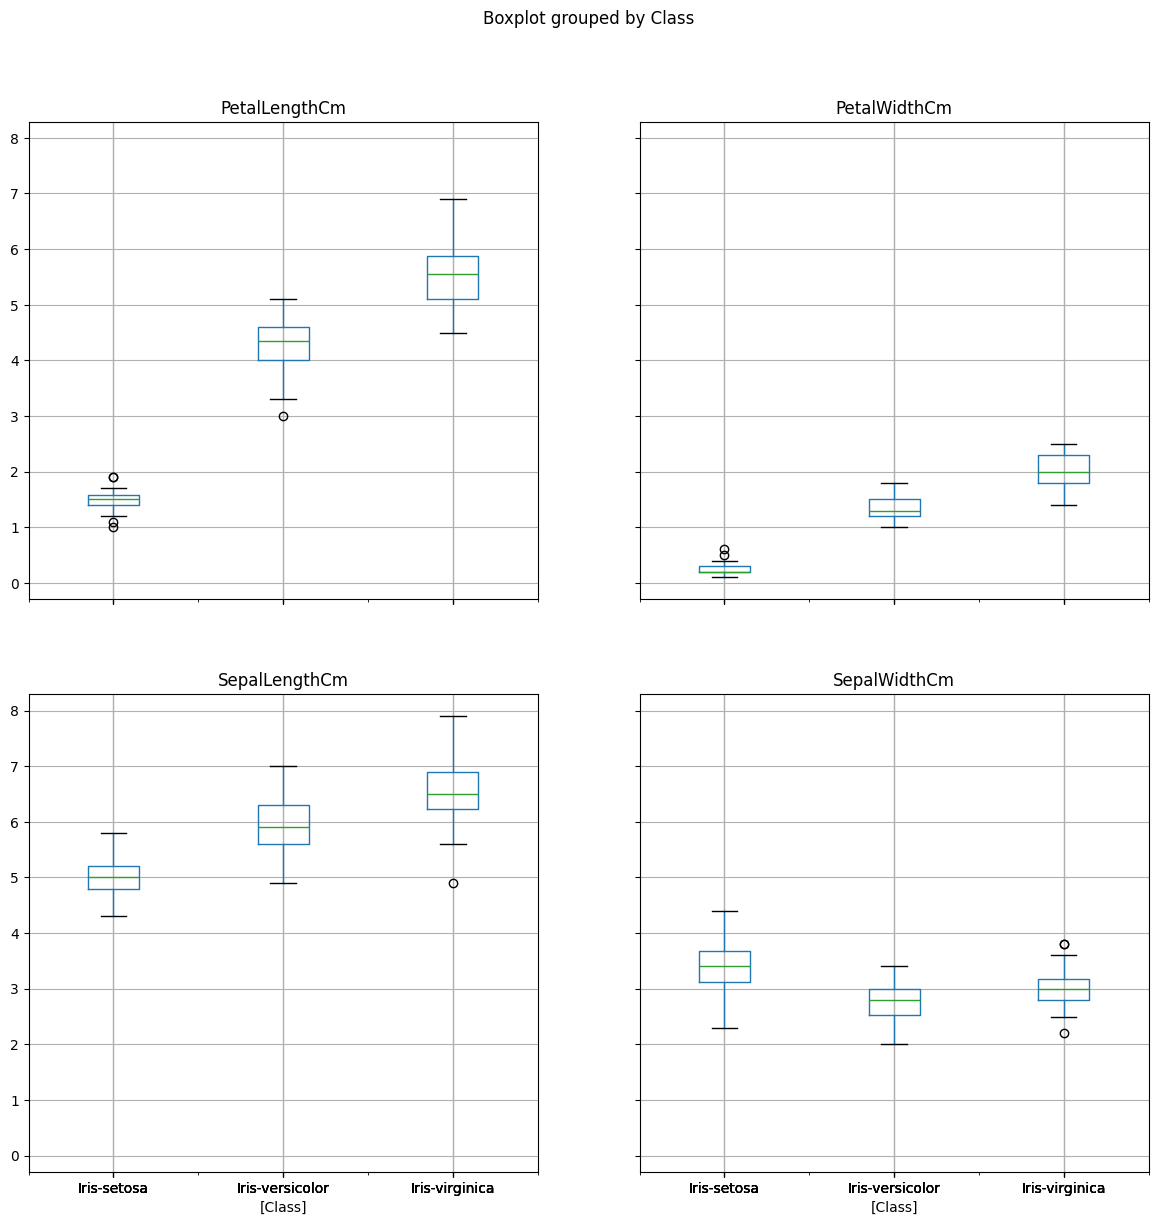

In [ ]:
df.boxplot(by="Class", layout=(2, 2), figsize=(14, 14))

The boxplots reveal several insights, including that virginica has the largest median petal length. The data also contains only a few outliers.

In [ ]:
X = df.iloc[:,0:4].values
y = df.iloc[:,4].values

In [ ]:
X.shape, y.shape;

Data set is now stored in the form of a 150×4 matrix where the columns are the different features, and every row represents a separate flower sample.

Each sample row x can be pictured as a **4-dimensional vector** as we can see in the above screenshot of x output values.

# **Standardization (Normalizing the data):**

When the features are measured on different scales, it is recommended to standardize the data to ensure all feature spaces have a *mean of 0 and variance of 1*.

Standardization is crucial before applying PCA because PCA is highly sensitive to variance. If there are significant differences in the scales (ranges) of the features, those with larger scales will dominate those with smaller scales.


![formula](https://ashutoshtripathicom.files.wordpress.com/2019/07/standardization-1.png)

In [ ]:
X_std = StandardScaler().fit_transform(X)

# Compute Eigen Values and Eigen Vectors:
Here I am using numpy array to calculate Eigenvectors and Eigenvalues of the standardized feature space values.

In [ ]:
print('Covariance Matrix \n')

cov_mat = np.cov(X_std.T)
eig_vals, eig_vecs = np.linalg.eig(cov_mat)
print('Eigenvectors \n%s' %cov_mat)
print('Eigenvectors \n%s' %eig_vecs)
print('Eigenvalues \n%s' %eig_vals)

Covariance Matrix 

Eigenvectors 
[[ 1.00671141 -0.11010327  0.87760486  0.82344326]
 [-0.11010327  1.00671141 -0.42333835 -0.358937  ]
 [ 0.87760486 -0.42333835  1.00671141  0.96921855]
 [ 0.82344326 -0.358937    0.96921855  1.00671141]]
Eigenvectors 
[[ 0.52237162 -0.37231836 -0.72101681  0.26199559]
 [-0.26335492 -0.92555649  0.24203288 -0.12413481]
 [ 0.58125401 -0.02109478  0.14089226 -0.80115427]
 [ 0.56561105 -0.06541577  0.6338014   0.52354627]]
Eigenvalues 
[2.93035378 0.92740362 0.14834223 0.02074601]


## Eigen Vectors verification:

Sum of square of each value in an Eigenvector is 1. So let’s see if it holds true which mean we have computed Eigenvectors correctly.

In [ ]:
square_eig=[]
for i in eig_vecs:
    square_eig.append(i**2)
print(square_eig)

[array([0.27287211, 0.13862096, 0.51986524, 0.06864169]), array([0.06935581, 0.85665482, 0.05857991, 0.01540945]), array([3.37856219e-01, 4.44989610e-04, 1.98506285e-02, 6.41848163e-01]), array([0.31991586, 0.00427922, 0.40170422, 0.2741007 ])]


In [ ]:
x = sum(square_eig)
print(x)
print("\n Sum of squares of each values in an  eigen vector is: \n",0.27287211+ 0.13862096+0.51986524+ 0.06864169)
for e in eig_vecs:
    np.testing.assert_array_almost_equal(1.0, np.linalg.norm(e))

[1. 1. 1. 1.]

 Sum of squares of each values in an  eigen vector is: 
 1.0


# Selecting the K Principal Components:

How do we select the new set of principal components?

The basic rule is to sort the eigenvalues in descending order and then pick the top k features that correspond to the largest eigenvalues.
The idea behind this is that by choosing the top k, we are assuming that the variance associated with those k components is enough to represent the dataset. Ignoring the variance from the remaining components doesn't significantly impact the accuracy, or the loss in accuracy due to the ignored variance is acceptable.

This decision depends on the specific problem and business case. There's no perfect rule to follow; it should be based on the context.

In [ ]:
#Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]
print(type(eig_pairs))
#Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort()
eig_pairs.reverse()
print("\n",eig_pairs)
#Visually confirm that the list is correctly sorted by decreasing eigenvalues
print('\n\n\nEigenvalues in descending order:')
sorted_eigen_values = []
sorted_eigen_vectors = []

for i,k in zip(eig_pairs,range(len(eig_pairs))):
    print(i[0])
    sorted_eigen_values.append(i[0])
    sorted_eigen_vectors.append(list(eig_pairs[k][1]))

sorted_eigen_vectors

<class 'list'>

 [(2.930353775589317, array([ 0.52237162, -0.26335492,  0.58125401,  0.56561105])), (0.9274036215173419, array([-0.37231836, -0.92555649, -0.02109478, -0.06541577])), (0.14834222648163944, array([-0.72101681,  0.24203288,  0.14089226,  0.6338014 ])), (0.02074601399559593, array([ 0.26199559, -0.12413481, -0.80115427,  0.52354627]))]



Eigenvalues in descending order:
2.930353775589317
0.9274036215173419
0.14834222648163944
0.02074601399559593


[[0.5223716204076599,
  -0.2633549153139403,
  0.5812540055976477,
  0.5656110498826491],
 [-0.3723183633499689,
  -0.9255564941472946,
  -0.021094776841246433,
  -0.06541576907892797],
 [-0.7210168090620422,
  0.24203287721394123,
  0.14089225848754092,
  0.633801403355824],
 [0.2619955868999825,
  -0.1241348100626826,
  -0.8011542690799242,
  0.5235462716041895]]

### -> Explained Variance :

#### -A useful measure is the so-called “explained variance,” which can be calculated from the eigenvalues.
#### -The explained variance tells us how much information (variance) can be attributed to each of the principal components.

In [ ]:
tot = sum(eig_vals)
print("\n",tot)
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]
print("\n\n1. Variance Explained\n",var_exp)
cum_var_exp = np.cumsum(var_exp)
print("\n\n2. Cumulative Variance Explained\n",cum_var_exp)
print("\n\n3. Percentage of variance the first two principal components each contain\n ",var_exp[0:2])
print("\n\n4. Percentage of variance the first two principal components together contain\n",sum(var_exp[0:2]))



 4.026845637583894


1. Variance Explained
 [72.77045209380135, 23.03052326768065, 3.683831957627379, 0.5151926808906321]


2. Cumulative Variance Explained
 [ 72.77045209  95.80097536  99.48480732 100.        ]


3. Percentage of variance the first two principal components each contain
  [72.77045209380135, 23.03052326768065]


4. Percentage of variance the first two principal components together contain
 95.800975361482


(1.0, 4.0)

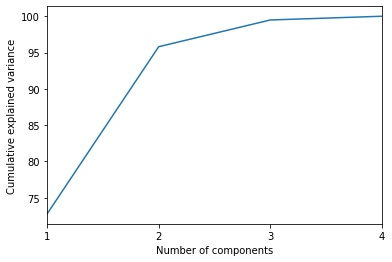

In [ ]:
xint = range(1, len(cum_var_exp) + 1)
plt.plot(xint, cum_var_exp)

plt.xlabel("Number of components")
plt.ylabel("Cumulative explained variance")
plt.xticks(xint)
plt.xlim(1, 4, 1)

#### From the plot, we can see that over 95% of the variance is captured within the two largest principal components. Therefore, it is acceptable to choose the first two largest principal components to make up the projection matrix W.

<a id="section-5"></a>
## 5. Construct the projection matrix W from the selected k eigenvectors:

#### -Projection matrix will be used to transform the Iris data onto the new feature subspace or we say new transformed data set with reduced dimensions.

#### -It is matrix of our concatenated top k Eigenvectors.
#### -Here, we are reducing the 4-dimensional feature space to a 2-dimensional feature subspace, by choosing the “top 2” Eigenvectors with the highest Eigenvalues to construct our d×k-dimensional Eigenvector matrix W.



In [ ]:
print(eig_pairs[0][1])
print(eig_pairs[1][1])
matrix_w = np.hstack((eig_pairs[0][1].reshape(4,1),
                      eig_pairs[1][1].reshape(4,1)))
#hstack: Stacks arrays in sequence horizontally (column wise).
print('Matrix W:\n', matrix_w)

[ 0.52237162 -0.26335492  0.58125401  0.56561105]
[-0.37231836 -0.92555649 -0.02109478 -0.06541577]
Matrix W:
 [[ 0.52237162 -0.37231836]
 [-0.26335492 -0.92555649]
 [ 0.58125401 -0.02109478]
 [ 0.56561105 -0.06541577]]


<a id="section-6"></a>
## 6. Projection Onto the New Feature Space:

#### In this last step we will use the 4×2-dimensional projection matrix W to transform our samples onto the new subspace via the equation Y=X×W, where the output matrix Y will be a 150×2 matrix of our transformed samples.

In [ ]:
Y = X_std.dot(matrix_w)
principalDf = pd.DataFrame(data = Y
          , columns = ['principal component 1', 'principal component 2'])
principalDf.head()

,principal component 1,principal component 2
0,-2.264542,-0.505704
1,-2.086426,0.655405
2,-2.367950,0.318477
3,-2.304197,0.575368
4,-2.388777,-0.674767


#### Compiling into a fresh DataFrame.

In [ ]:
finalDf = pd.concat([principalDf,pd.DataFrame(y,columns = ['species'])], axis = 1)
finalDf.head()

,principal component 1,principal component 2,species
0,-2.264542,-0.505704,Iris-setosa
1,-2.086426,0.655405,Iris-setosa
2,-2.367950,0.318477,Iris-setosa
3,-2.304197,0.575368,Iris-setosa
4,-2.388777,-0.674767,Iris-setosa


## Visualizing the Target Classes on the axes of the 2 new PCs - PC1 and PC2.

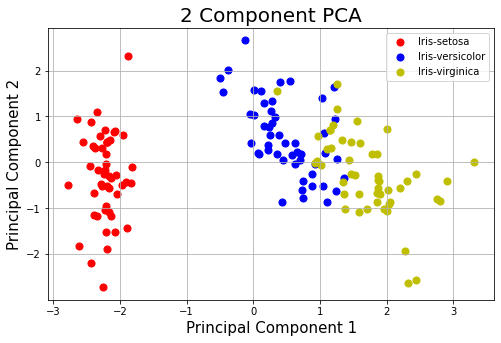

In [ ]:
fig = plt.figure(figsize = (8,5))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 Component PCA', fontsize = 20)
targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'b', 'y']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['species'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

<a id="section-7"></a>
## **Bonus:** Doing this with the Python Library.

In [ ]:
pca = PCA(n_components=2) # Here we can also give the percentage as a paramter to the PCA function as pca = PCA(.95). .95 means that we want to include 95% of the variance. Hence PCA will return the no of components which describe 95% of the variance. However we know from above computation that 2 components are enough so we have passed the 2 components.
principalComponents = pca.fit_transform(X_std)
principalDf = pd.DataFrame(data = principalComponents
              , columns = ['principal component 1', 'principal component 2'])
principalDf.head(5) # prints the top 5 rows

,principal component 1,principal component 2
0,-2.264542,0.505704
1,-2.086426,-0.655405
2,-2.367950,-0.318477
3,-2.304197,-0.575368
4,-2.388777,0.674767


In [ ]:
finalDf = pd.concat([principalDf, finalDf[['species']]], axis = 1)
finalDf.head(5)

,principal component 1,principal component 2,species
0,-2.264542,0.505704,Iris-setosa
1,-2.086426,-0.655405,Iris-setosa
2,-2.367950,-0.318477,Iris-setosa
3,-2.304197,-0.575368,Iris-setosa
4,-2.388777,0.674767,Iris-setosa


<a id="conclusion"></a>
**Note:** As we can see, we have achieved the similar results with the Python library as well.

**Conclusion:** Together, the first two principal components contain 95.80% of the information. The first principal component contains 72.77% of the variance and the second principal component contains 23.03% of the variance. The third and fourth principal component contained the rest of the variance of the data set.